# EDA Q2: Which city, on average, has the most expensive homes?

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 1. Import Data

In [29]:
data = pd.read_csv('csv_files/cleaned_data.csv',index_col=0)

# 2. Add City to the Data

In [30]:
from bs4 import BeautifulSoup
import requests

url = 'https://www.zip-codes.com/county/wa-king.asp#zipcodes'
page = requests.get(url)
soup = BeautifulSoup(page.content,'html.parser')
tb = soup.find('table',class_='statTable')

list_zip_codes = []
for link in tb.find_all('td'):
    zip_code = link.find('a')
    if zip_code is None:
        continue
    list_zip_codes.append(zip_code.get_text('title'))

zip_code_df = pd.concat([pd.Series([list_zip_codes[i][-5:] for i in range(0,len(list_zip_codes),2)]).astype('int64'),
                         pd.Series([list_zip_codes[i] for i in range(1,len(list_zip_codes),2)])],axis=1).rename(columns={0:'zipcode',1:'city'})
zip_code_df.head()

,zipcode,city
0,98001,Auburn
1,98002,Auburn
2,98003,Federal Way
3,98004,Bellevue
4,98005,Bellevue


In [31]:
city_data = pd.merge(data,zip_code_df,on='zipcode',how='inner')[['city','price']]
city_data = city_data[city_data['price'] <= 2000000]
city_data.head()

,city,price
0,Seattle,538000.00000
1,Seattle,571000.00000
2,Seattle,315000.00000
3,Seattle,382500.00000
4,Seattle,425000.00000


# 3. Plot Prices for each City

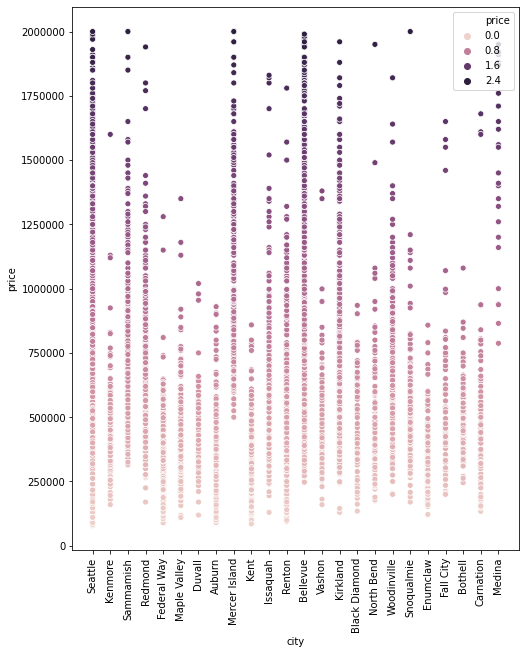

In [32]:
# plot prices for each city
plt.figure(figsize=(8,10))
plt.ticklabel_format(style='plain', axis='y')
ax = sns.scatterplot(x='city',y='price',hue='price',data=city_data)
plt.xticks(rotation=90)
plt.savefig('images/EDA_2_scatter.png');

# 4. Descriptive Statistics

In [33]:
# group prices by city
city_data_statistics = pd.DataFrame(city_data.groupby('city').describe()).reset_index()

# drop column level
city_data_statistics.columns = city_data_statistics.columns.droplevel()

# rename column to city
city_data_statistics = city_data_statistics.rename(columns={list(city_data_statistics)[0]:'city'})

city_data_statistics

,city,count,mean,std,min,25%,50%,75%,max
0,Auburn,814.00000,291734.40541,109009.49694,90000.00000,224612.50000,270000.00000,332775.00000,930000.00000
1,Bellevue,1197.00000,828174.15622,373006.06533,247500.00000,550000.00000,740000.00000,965000.00000,1990000.00000
2,Black Diamond,87.00000,425072.97701,197314.49209,135000.00000,258500.00000,359999.00000,595000.00000,935000.00000
3,Bothell,174.00000,492930.12069,122813.43628,245500.00000,417750.00000,473000.00000,550000.00000,1080000.00000
4,Carnation,109.00000,471750.72477,269590.29962,134000.00000,315000.00000,425000.00000,560000.00000,1680000.00000
5,Duvall,167.00000,430274.92216,131177.95085,119500.00000,334600.00000,406250.00000,505000.00000,1020000.00000
6,Enumclaw,209.00000,315731.94737,125642.96379,122000.00000,231200.00000,278500.00000,346290.00000,858000.00000
7,Fall City,73.00000,549454.38356,316046.95358,200000.00000,340000.00000,457000.00000,685000.00000,1650000.00000
8,Federal Way,692.00000,289478.64451,106772.59113,89000.00000,228585.00000,268250.00000,320000.00000,1280000.00000
9,Issaquah,658.00000,595879.38754,210658.55826,130000.00000,464962.50000,560000.00000,689975.00000,1830000.00000


# 5. Plot Average Price Per City

In [34]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
average_city_data = city_data_statistics[['city','mean']].sort_values(by=['mean'],ascending=False)
average_city_data.head()

,city,mean
14,Medina,1472692.30769
15,Mercer Island,1077777.55844
1,Bellevue,828174.15622
19,Sammamish,721923.77682
17,Redmond,652284.88037


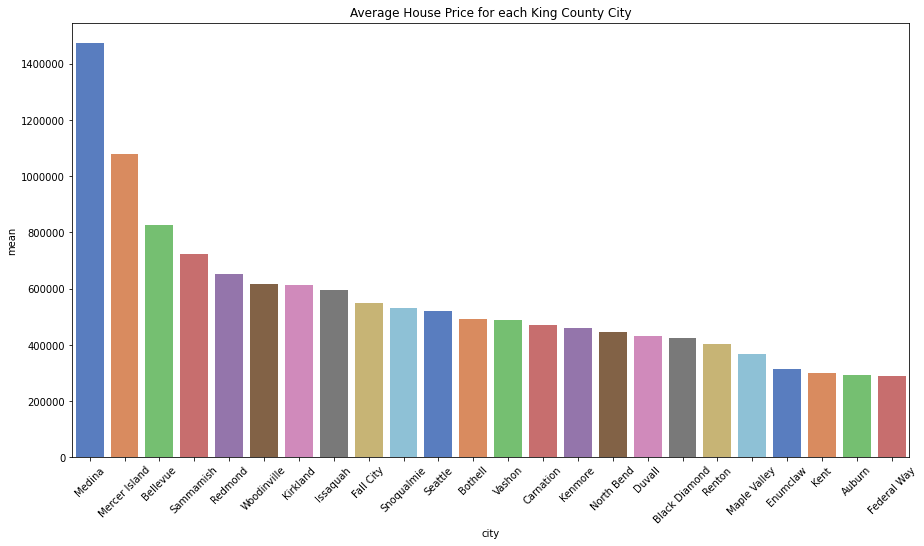

In [35]:
plt.figure(figsize=(15,8))
ax = sns.barplot(y= "mean", x = "city", data = average_city_data,palette=("muted"))
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.title('Average House Price for each King County City')
plt.savefig('images/EDA_2_bar.png')
plt.show()

## Interpretation

The city with the highest average price is Medina with an average of 2.2m. After doing more research on Medina, Bill Gates (Founder of Microsoft) and Jeff Bezos (Found of Amazon) along with other big name executives all have houses in Medina. This explains why the prices are so high with the highest house sold from 2014-2015 is 6.9m!

Federal Way is the city with the lowest average price. Though the average house price is low, the standard deviation is ~106,000 which is among the lowest in King County.